In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('estaciones_bici.csv', delimiter=';',index_col=0)


In [8]:
df 

,_id,available,connected,download_date,estation,free,open,ticket,total,updated
0,5c6050a42554172704fccdc0,9,1,2019-02-10 17:25:37.787,64,11,1,0,20,2019-02-10 17:21:13.000
1,5c6050a42554172704fccdc1,6,1,2019-02-10 17:25:37.787,73,14,1,1,20,2019-02-10 17:24:13.000
2,5c605be225541729b7d50885,20,1,2019-02-10 18:13:39.827,63,0,1,1,20,2019-02-10 18:09:16.000
3,5c605be225541729b7d50886,6,1,2019-02-10 18:13:39.827,64,14,1,0,20,2019-02-10 18:12:15.000
4,5c605be225541729b7d50887,9,1,2019-02-10 18:13:39.827,65,10,1,1,19,2019-02-10 18:09:16.000
...,...,...,...,...,...,...,...,...,...,...
27542,5c61face25541729b7d57419,0,1,2019-02-11 23:44:00.786,260,20,1,0,20,2019-02-11 23:42:16.000
27543,5c61face25541729b7d5741a,15,1,2019-02-11 23:44:00.786,261,4,1,0,19,2019-02-11 23:39:16.000
27544,5c61face25541729b7d5741b,1,1,2019-02-11 23:44:00.786,268,9,1,1,10,2019-02-11 23:42:16.000
27545,5c61face25541729b7d5741c,1,1,2019-02-11 23:44:00.786,269,14,1,0,15,2019-02-11 23:39:16.000


In [9]:
#Obtencion del Numero de Estaciones con Total de 30
df30=df.loc[df['estation'] ==30]
print(df30.estation.sum())


3000


In [12]:
nuevo=df.groupby('estation')[["available"]].aggregate('mean')
print(nuevo)
nuevo.max()

          available
estation           
1         12.040000
2          2.070000
3          3.300000
4          3.100000
5          8.730000
...             ...
272       13.444444
273        6.242424
274        4.989899
275       16.222222
276       15.323232

[276 rows x 1 columns]


available    31.26
dtype: float64

In [13]:
dfn=nuevo.loc[nuevo['available'] ==31.26]
dfn

,available
estation,
50,31.26


In [43]:
Bici = df[df['estation'] == 50]
bici=Bici.loc[(Bici.available>0)]
bici

,_id,available,connected,download_date,estation,free,open,ticket,total,updated
74,5c605be225541729b7d508cd,39,1,2019-02-10 18:13:39.827,50,1,1,1,40,2019-02-10 18:12:15.000
350,5c605f8625541729b7d509e1,36,1,2019-02-10 18:29:13.135,50,4,1,1,40,2019-02-10 18:24:14.000
625,5c60632925541729b7d50af4,33,1,2019-02-10 18:44:43.728,50,7,1,1,40,2019-02-10 18:42:14.000
901,5c6066cf25541729b7d50c08,31,1,2019-02-10 19:00:14.475,50,9,1,1,40,2019-02-10 19:00:14.000
1177,5c606a7325541729b7d50d1c,33,1,2019-02-10 19:15:48.800,50,7,1,1,40,2019-02-10 19:15:16.000
...,...,...,...,...,...,...,...,...,...,...
26239,5c61ec4225541729b7d56f02,32,1,2019-02-11 22:41:56.937,50,8,1,1,40,2019-02-11 22:39:17.000
26515,5c61efe525541729b7d57016,33,1,2019-02-11 22:57:27.760,50,7,1,1,40,2019-02-11 22:57:17.000
26791,5c61f38825541729b7d5712a,33,1,2019-02-11 23:12:58.602,50,7,1,1,40,2019-02-11 23:12:16.000
27067,5c61f72b25541729b7d5723e,32,1,2019-02-11 23:28:29.903,50,8,1,1,40,2019-02-11 23:27:14.000


Text(0, 0.5, 'Frequencia')

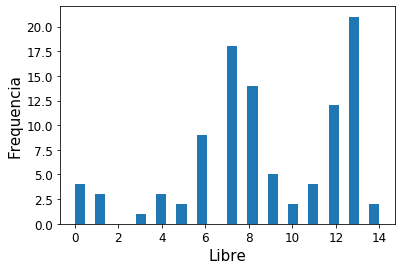

In [46]:
bici['free'].hist(bins=30, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Libre", fontsize=15)
plt.ylabel("Frequencia",fontsize=15)


([<matplotlib.axis.XTick at 0x211c5ca7fc8>,
 <a list of 6 Text xticklabel objects>)

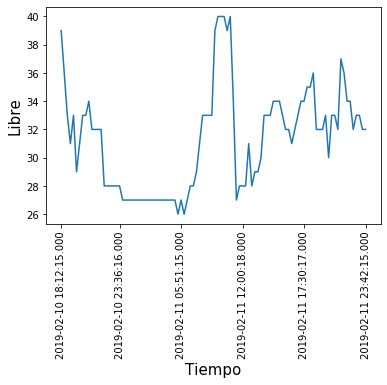

In [47]:
plt.plot(bici.updated,bici.available)
plt.xlabel("Tiempo", fontsize=15)
plt.ylabel("Libre",fontsize=15)
plt.xticks([0,19,39,59,79,99],rotation='vertical')

In [17]:
df.head()

,_id,available,connected,download_date,estation,free,open,ticket,total,updated
0,5c6050a42554172704fccdc0,9,1,2019-02-10 17:25:37.787,64,11,1,0,20,2019-02-10 17:21:13.000
1,5c6050a42554172704fccdc1,6,1,2019-02-10 17:25:37.787,73,14,1,1,20,2019-02-10 17:24:13.000
2,5c605be225541729b7d50885,20,1,2019-02-10 18:13:39.827,63,0,1,1,20,2019-02-10 18:09:16.000
3,5c605be225541729b7d50886,6,1,2019-02-10 18:13:39.827,64,14,1,0,20,2019-02-10 18:12:15.000
4,5c605be225541729b7d50887,9,1,2019-02-10 18:13:39.827,65,10,1,1,19,2019-02-10 18:09:16.000


In [18]:
df30=df.loc[(df.free==0)&(df.available==0)]
df30

,_id,available,connected,download_date,estation,free,open,ticket,total,updated
129,5c605be225541729b7d50904,0,1,2019-02-10 18:13:39.827,17,0,1,1,40,2019-02-10 18:09:15.000
405,5c605f8625541729b7d50a18,0,1,2019-02-10 18:29:13.135,17,0,1,1,40,2019-02-10 18:24:14.000
680,5c60632925541729b7d50b2b,0,1,2019-02-10 18:44:43.728,17,0,1,1,40,2019-02-10 18:39:13.000
956,5c6066cf25541729b7d50c3f,0,1,2019-02-10 19:00:14.475,17,0,1,1,40,2019-02-10 19:00:14.000
1232,5c606a7325541729b7d50d53,0,1,2019-02-10 19:15:48.800,17,0,1,1,40,2019-02-10 19:12:12.000
1508,5c606e1625541729b7d50e67,0,1,2019-02-10 19:31:20.028,17,0,1,1,40,2019-02-10 19:27:13.000
1784,5c6071b925541729b7d50f7b,0,1,2019-02-10 19:46:51.095,17,0,1,1,40,2019-02-10 19:45:14.000
2060,5c60755c25541729b7d5108f,0,1,2019-02-10 20:02:21.887,17,0,1,1,40,2019-02-10 20:00:18.000
2336,5c6078fe25541729b7d511a3,0,1,2019-02-10 20:17:52.989,17,0,1,1,40,2019-02-10 20:12:21.000
2612,5c607ca125541729b7d512b7,0,1,2019-02-10 20:33:23.761,17,0,1,1,40,2019-02-10 20:33:14.000
